In [1]:
from fastai.data.all import *
from fastai.tabular.all import *

absolute_path = Path().absolute()
sys.path.append(str(absolute_path.parents[0]))

from enveco.tabular.preprocessing import *
from enveco.model.ensemble import *
from enveco.interpretation import *
from enveco.metrics import *

/home/mayrajeo/miniconda3/envs/enveco/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729062494/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


# Compare results

In [2]:
result_path = Path('results_15_1/')
folders = os.listdir(result_path)
data_path = Path('../../enveco_data/enveco/')


d_results = [f for f in folders if f.startswith('d_')]
g_results = [f for f in folders if f.startswith('g_')]
h_results = [f for f in folders if f.startswith('h_')]
v_ma_results = [f for f in folders if f.startswith('v_ma_')]
v_ku_results = [f for f in folders if f.startswith('v_ku_')]
v_lp_results = [f for f in folders if f.startswith('v_lp_')]
v_results = [f for f in folders if f.startswith('v_') and 
             not any([f.startswith('v_ma_'), f.startswith('v_ku_'), f.startswith('v_lp_')])]

In [3]:
preprocessor = EnvecoPreprocessor(data_path/'AV.leaf.on.train.csv',
                                  data_path/'AV.leaf.on.val.csv',
                                  data_path/'AV.leaf.on.test.csv')

def get_test_tbs(preprocessor, target):
    _, test_las = preprocessor.load_las(path='model_data', target_col=target, log_y=False)
    _, test_image = preprocessor.load_image(path='model_data', target_col=target, log_y=False)
    _, test_both = preprocessor.load_las_image(path='model_data', target_col=target, log_y=False)
    _, test_las_log = preprocessor.load_las(path='model_data', target_col=target, log_y=True)
    _, test_image_log = preprocessor.load_image(path='model_data', target_col=target, log_y=True)
    _, test_both_log = preprocessor.load_las_image(path='model_data', target_col=target, log_y=True)
    return (test_las.dataloaders(y_block=RegressionBlock(), shuffle_train=False, drop_last=False), 
            test_image.dataloaders(y_block=RegressionBlock(), shuffle_train=False, drop_last=False), 
            test_both.dataloaders(y_block=RegressionBlock(), shuffle_train=False, drop_last=False), 
            test_las_log.dataloaders(y_block=RegressionBlock(), shuffle_train=False, drop_last=False), 
            test_image_log.dataloaders(y_block=RegressionBlock(), shuffle_train=False, drop_last=False), 
            test_both_log.dataloaders(y_block=RegressionBlock(), shuffle_train=False, drop_last=False))

In [4]:
def get_models(path, folders):
    both = load_ensemble(path/folders[0]/'models')
    both_log = load_ensemble(path/folders[1]/'models')
    image = load_ensemble(path/folders[2]/'models')
    image_log = load_ensemble(path/folders[3]/'models')
    las = load_ensemble(path/folders[4]/'models')
    las_log = load_ensemble(path/folders[5]/'models')
    return both, both_log, image, image_log, las, las_log

# Volume

In [5]:
test_las, test_image, test_both, test_las_log, test_image_log, test_both_log = get_test_tbs(preprocessor, 'v')

In [6]:
both, both_log, image, image_log, las, las_log = get_models(result_path, v_results)

## Only LAS data

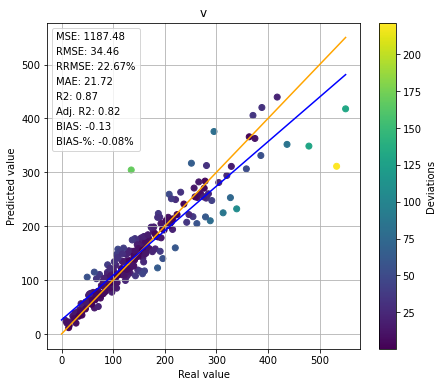

In [7]:
las_interp = RegressionInterpretation.from_ensemble(las, dl=test_las.train, ds_idx=0)
las_interp.plot_results(log_y=False)
plt.show()

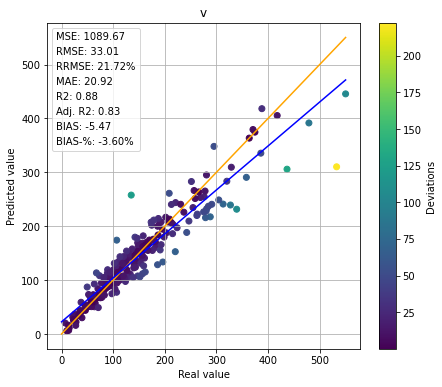

In [8]:
las_log_interp = RegressionInterpretation.from_ensemble(las_log, dl=test_las_log.train, ds_idx=0)
las_log_interp.plot_results(log_y=True)
plt.show()

## Only image data

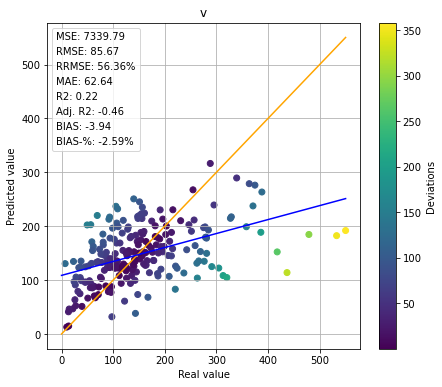

In [9]:
image_interp = RegressionInterpretation.from_ensemble(image, dl=test_image.train, ds_idx=0)
image_interp.plot_results(log_y=False)
plt.show()

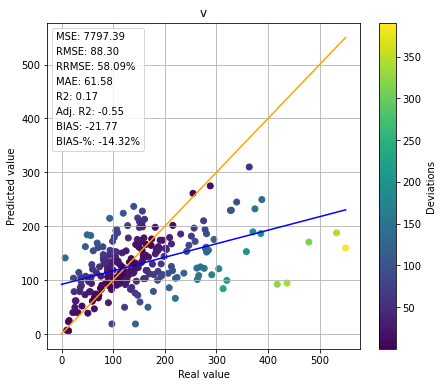

In [10]:
image_log_interp = RegressionInterpretation.from_ensemble(image_log, dl=test_image_log.train, ds_idx=0)
image_log_interp.plot_results(log_y=True)
plt.show()

## Both

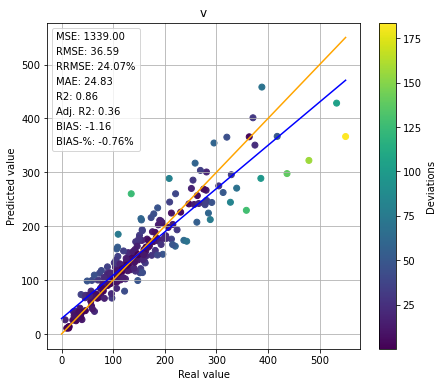

In [11]:
both_interp = RegressionInterpretation.from_ensemble(both, dl=test_both.train, ds_idx=0)
both_interp.plot_results(log_y=False)
plt.show()

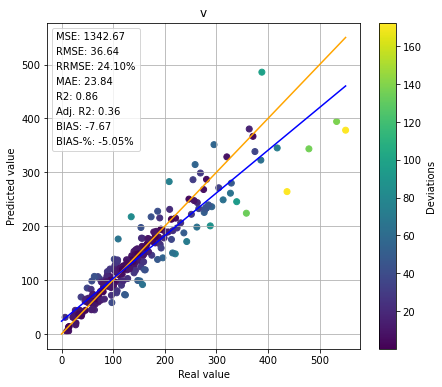

In [12]:
both_log_interp = RegressionInterpretation.from_ensemble(both_log, dl=test_both_log.train, ds_idx=0)
both_log_interp.plot_results(log_y=True)
plt.show()

# DBH

In [13]:
test_las, test_image, test_both, test_las_log, test_image_log, test_both_log = get_test_tbs(preprocessor, 'd')

In [14]:
both, both_log, image, image_log, las, las_log = get_models(result_path, d_results)

## Only LAS data

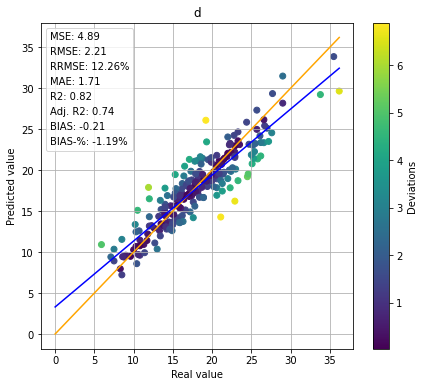

In [15]:
las_interp = RegressionInterpretation.from_ensemble(las, dl=test_las.train, ds_idx=0)
las_interp.plot_results(log_y=False)
plt.show()

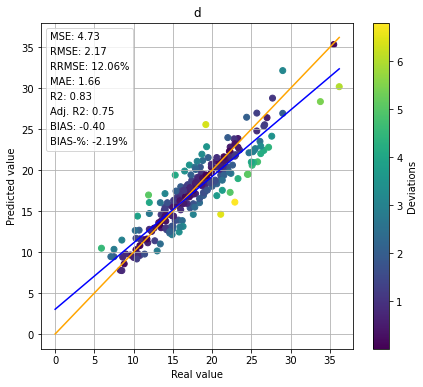

In [16]:
las_log_interp = RegressionInterpretation.from_ensemble(las_log, dl=test_las_log.train, ds_idx=0)
las_log_interp.plot_results(log_y=True)
plt.show()

## Only image data

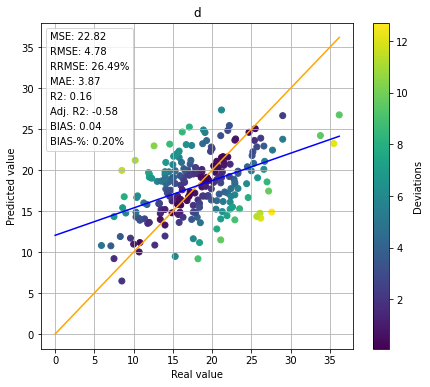

In [17]:
image_interp = RegressionInterpretation.from_ensemble(image, dl=test_image.train, ds_idx=0)
image_interp.plot_results(log_y=False)
plt.show()

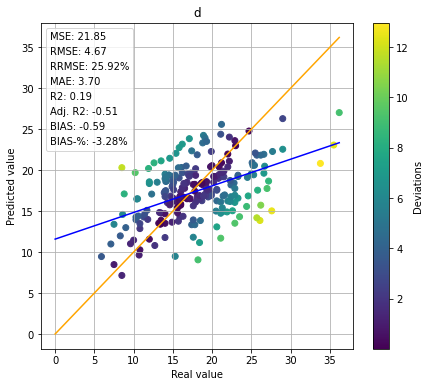

In [18]:
image_log_interp = RegressionInterpretation.from_ensemble(image_log, dl=test_image_log.train, ds_idx=0)
image_log_interp.plot_results(log_y=True)
plt.show()

## Both

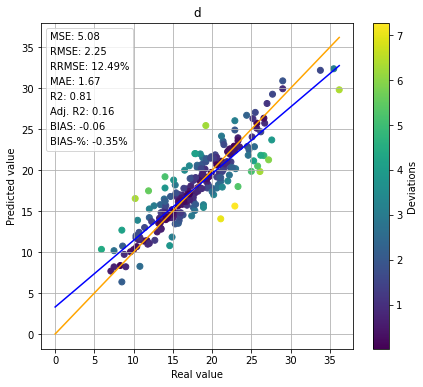

In [19]:
both_interp = RegressionInterpretation.from_ensemble(both, dl=test_both.train, ds_idx=0)
both_interp.plot_results(log_y=False)
plt.show()

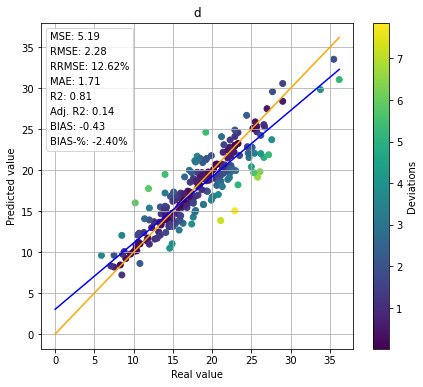

In [20]:
both_log_interp = RegressionInterpretation.from_ensemble(both_log, dl=test_both_log.train, ds_idx=0)
both_log_interp.plot_results(log_y=True)
plt.show()

# Basal area

In [21]:
test_las, test_image, test_both, test_las_log, test_image_log, test_both_log = get_test_tbs(preprocessor, 'g')

In [22]:
both, both_log, image, image_log, las, las_log = get_models(result_path, g_results)

## Only LAS data

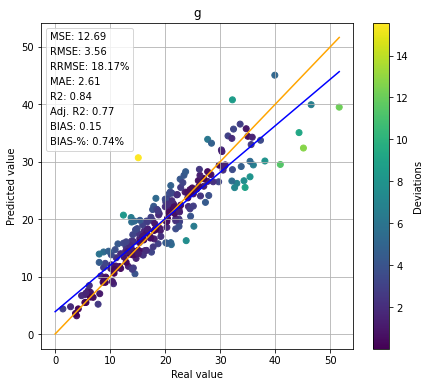

In [23]:
las_interp = RegressionInterpretation.from_ensemble(las, dl=test_las.train, ds_idx=0)
las_interp.plot_results(log_y=False)
plt.show()

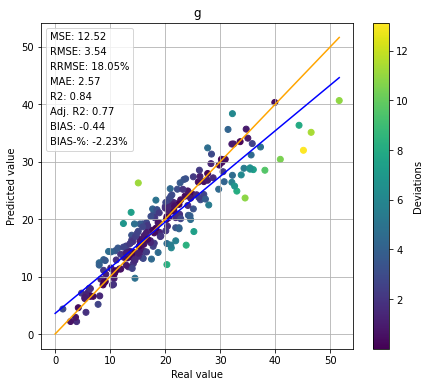

In [24]:
las_log_interp = RegressionInterpretation.from_ensemble(las_log, dl=test_las_log.train, ds_idx=0)
las_log_interp.plot_results(log_y=True)
plt.show()

## Only image data

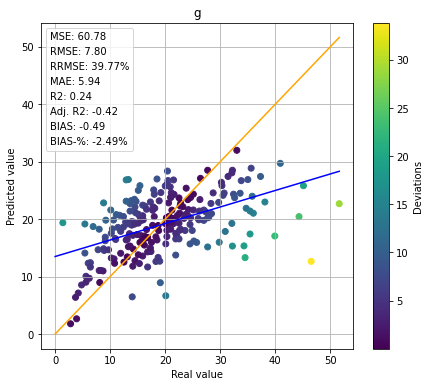

In [25]:
image_interp = RegressionInterpretation.from_ensemble(image, dl=test_image.train, ds_idx=0)
image_interp.plot_results(log_y=False)
plt.show()

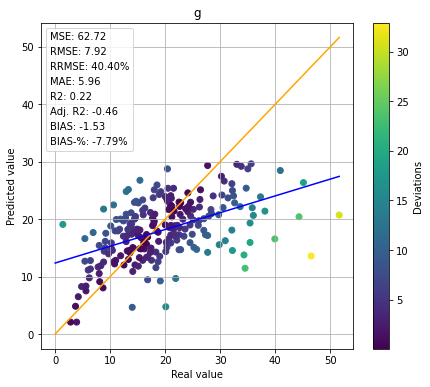

In [26]:
image_log_interp = RegressionInterpretation.from_ensemble(image_log, dl=test_image_log.train, ds_idx=0)
image_log_interp.plot_results(log_y=True)
plt.show()

## Both

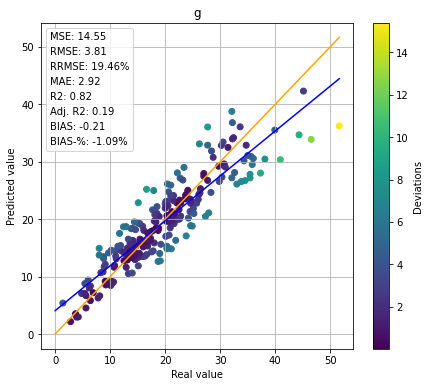

In [27]:
both_interp = RegressionInterpretation.from_ensemble(both, dl=test_both.train, ds_idx=0)
both_interp.plot_results(log_y=False)
plt.show()

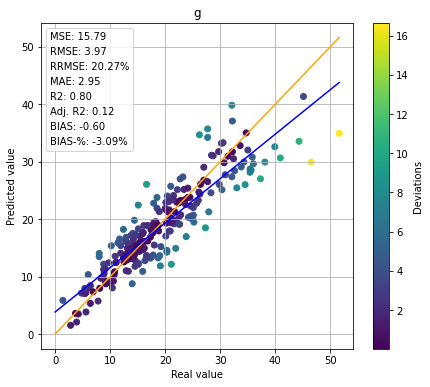

In [28]:
both_log_interp = RegressionInterpretation.from_ensemble(both_log, dl=test_both_log.train, ds_idx=0)
both_log_interp.plot_results(log_y=True)
plt.show()

# Height

In [29]:
test_las, test_image, test_both, test_las_log, test_image_log, test_both_log = get_test_tbs(preprocessor, 'h')

In [30]:
both, both_log, image, image_log, las, las_log = get_models(result_path, h_results)

## Only LAS data

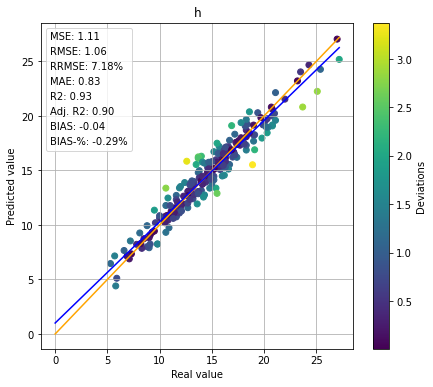

In [31]:
las_interp = RegressionInterpretation.from_ensemble(las, dl=test_las.train, ds_idx=0)
las_interp.plot_results(log_y=False)
plt.show()

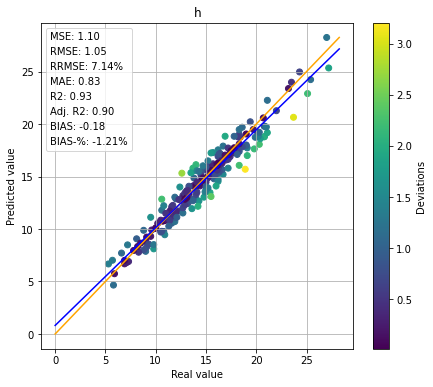

In [32]:
las_log_interp = RegressionInterpretation.from_ensemble(las_log, dl=test_las_log.train, ds_idx=0)
las_log_interp.plot_results(log_y=True)
plt.show()

## Only image data

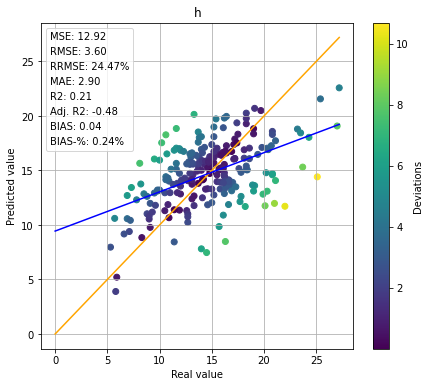

In [33]:
image_interp = RegressionInterpretation.from_ensemble(image, dl=test_image.train, ds_idx=0)
image_interp.plot_results(log_y=False)
plt.show()

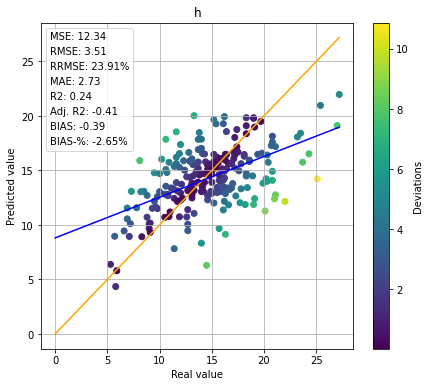

In [34]:
image_log_interp = RegressionInterpretation.from_ensemble(image_log, dl=test_image_log.train, ds_idx=0)
image_log_interp.plot_results(log_y=True)
plt.show()

## Both

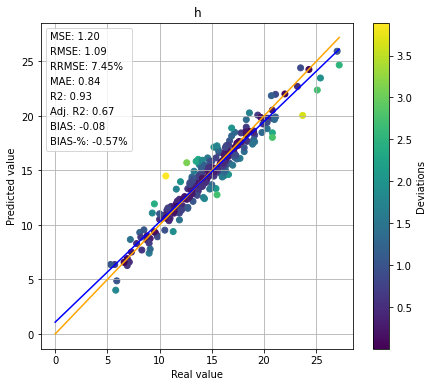

In [35]:
both_interp = RegressionInterpretation.from_ensemble(both, dl=test_both.train, ds_idx=0)
both_interp.plot_results(log_y=False)
plt.show()

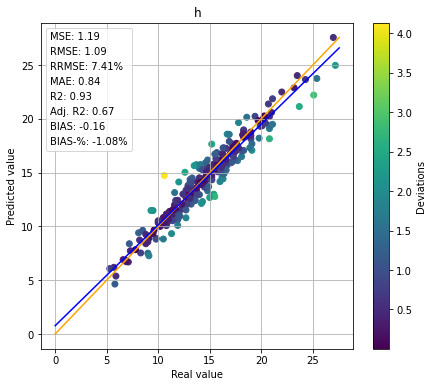

In [36]:
both_log_interp = RegressionInterpretation.from_ensemble(both_log, dl=test_both_log.train, ds_idx=0)
both_log_interp.plot_results(log_y=True)
plt.show()

# Volume of pine

In [37]:
test_las, test_image, test_both, test_las_log, test_image_log, test_both_log = get_test_tbs(preprocessor, 'v_ma')

In [38]:
both, both_log, image, image_log, las, las_log = get_models(result_path, v_ma_results)

## Only LAS data

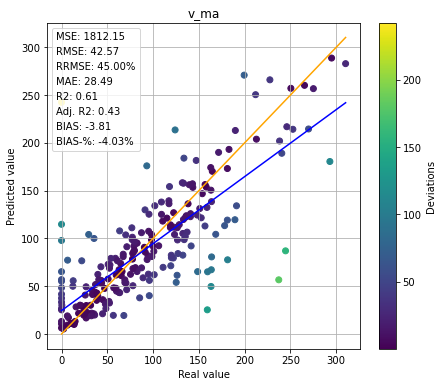

In [39]:
las_interp = RegressionInterpretation.from_ensemble(las, dl=test_las.train, ds_idx=0)
las_interp.plot_results(log_y=False)
plt.show()

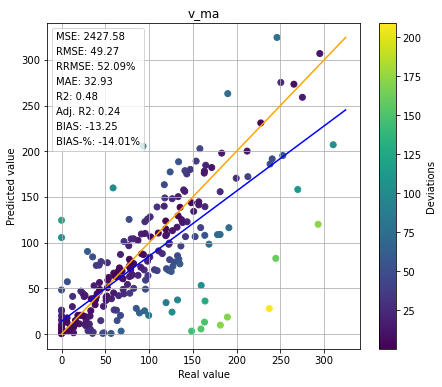

In [40]:
las_log_interp = RegressionInterpretation.from_ensemble(las_log, dl=test_las_log.train, ds_idx=0)
las_log_interp.plot_results(log_y=True)
plt.show()

## Only image data

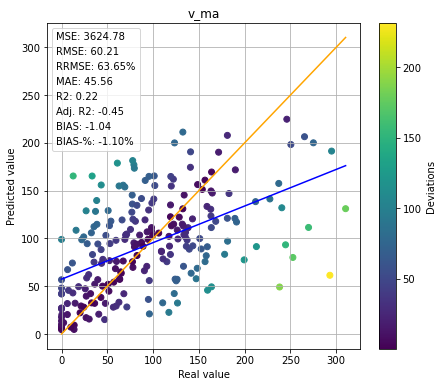

In [41]:
image_interp = RegressionInterpretation.from_ensemble(image, dl=test_image.train, ds_idx=0)
image_interp.plot_results(log_y=False)
plt.show()

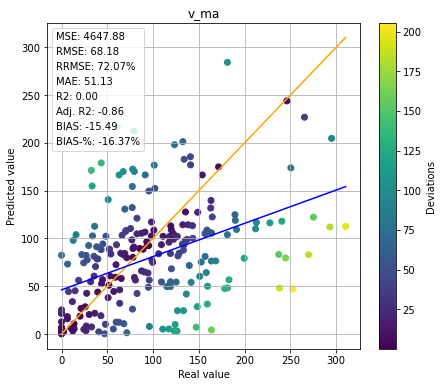

In [42]:
image_log_interp = RegressionInterpretation.from_ensemble(image_log, dl=test_image_log.train, ds_idx=0)
image_log_interp.plot_results(log_y=True)
plt.show()

## Both

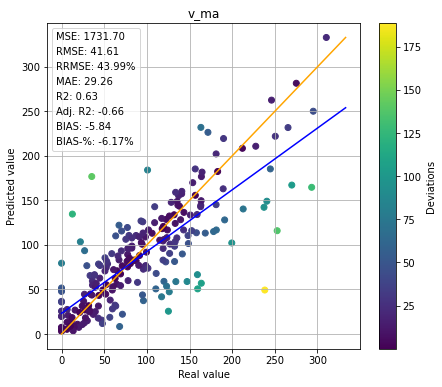

In [43]:
both_interp = RegressionInterpretation.from_ensemble(both, dl=test_both.train, ds_idx=0)
both_interp.plot_results(log_y=False)
plt.show()

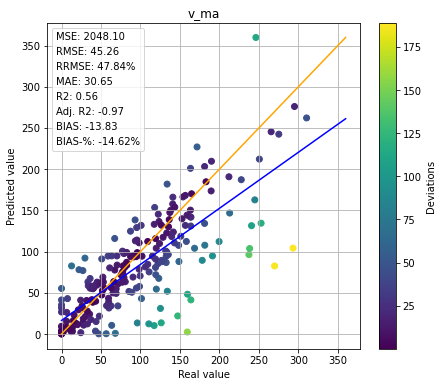

In [44]:
both_log_interp = RegressionInterpretation.from_ensemble(both_log, dl=test_both_log.train, ds_idx=0)
both_log_interp.plot_results(log_y=True)
plt.show()

# Volume of spruce

In [45]:
test_las, test_image, test_both, test_las_log, test_image_log, test_both_log = get_test_tbs(preprocessor, 'v_ku')

In [46]:
both, both_log, image, image_log, las, las_log = get_models(result_path, v_ku_results)

## Only LAS data

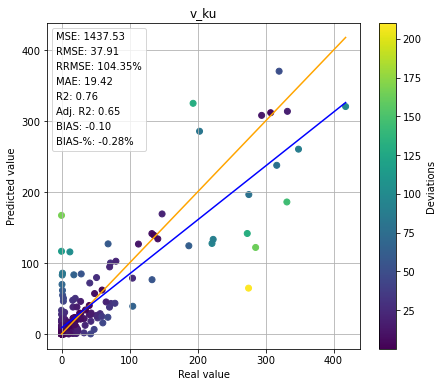

In [47]:
las_interp = RegressionInterpretation.from_ensemble(las, dl=test_las.train, ds_idx=0)
las_interp.plot_results(log_y=False)
plt.show()

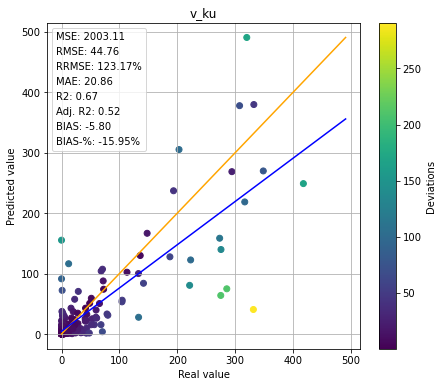

In [48]:
las_log_interp = RegressionInterpretation.from_ensemble(las_log, dl=test_las_log.train, ds_idx=0)
las_log_interp.plot_results(log_y=True)
plt.show()

## Only image data

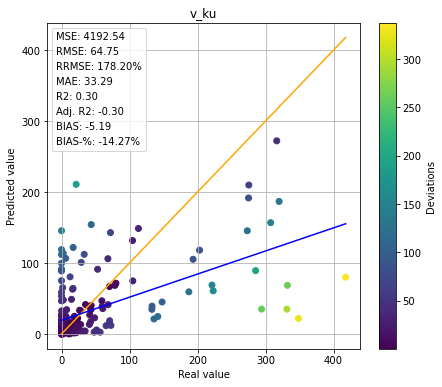

In [49]:
image_interp = RegressionInterpretation.from_ensemble(image, dl=test_image.train, ds_idx=0)
image_interp.plot_results(log_y=False)
plt.show()

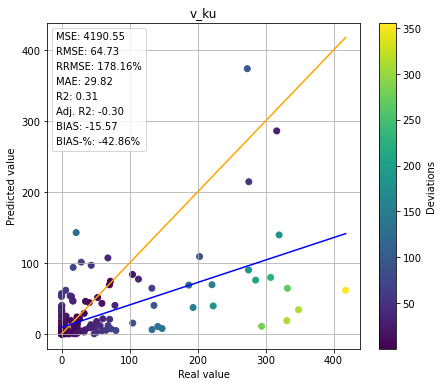

In [50]:
image_log_interp = RegressionInterpretation.from_ensemble(image_log, dl=test_image_log.train, ds_idx=0)
image_log_interp.plot_results(log_y=True)
plt.show()

## Both

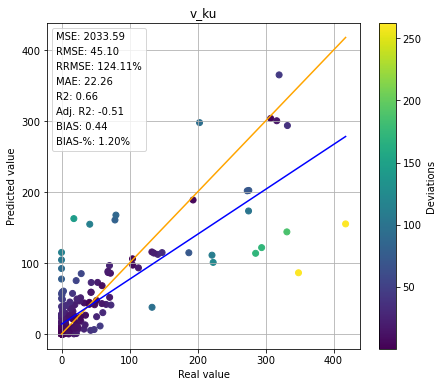

In [51]:
both_interp = RegressionInterpretation.from_ensemble(both, dl=test_both.train, ds_idx=0)
both_interp.plot_results(log_y=False)
plt.show()

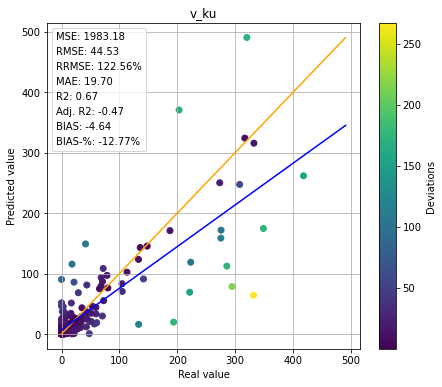

In [52]:
both_log_interp = RegressionInterpretation.from_ensemble(both_log, dl=test_both_log.train, ds_idx=0)
both_log_interp.plot_results(log_y=True)
plt.show()

# Volume of broadleafs

In [53]:
test_las, test_image, test_both, test_las_log, test_image_log, test_both_log = get_test_tbs(preprocessor, 'v_lp')

In [54]:
both, both_log, image, image_log, las, las_log = get_models(result_path, v_lp_results)

## Only LAS data

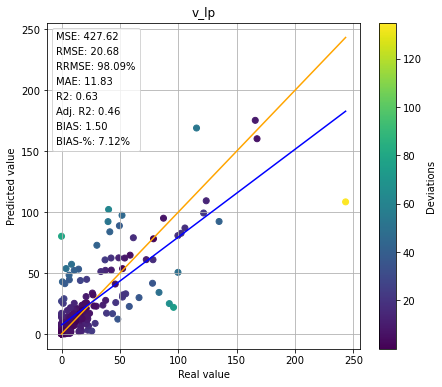

In [55]:
las_interp = RegressionInterpretation.from_ensemble(las, dl=test_las.train, ds_idx=0)
las_interp.plot_results(log_y=False)
plt.show()

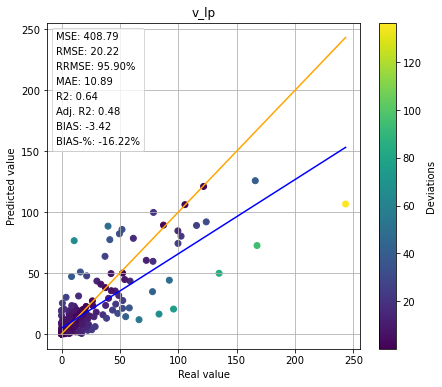

In [56]:
las_log_interp = RegressionInterpretation.from_ensemble(las_log, dl=test_las_log.train, ds_idx=0)
las_log_interp.plot_results(log_y=True)
plt.show()

## Only image data

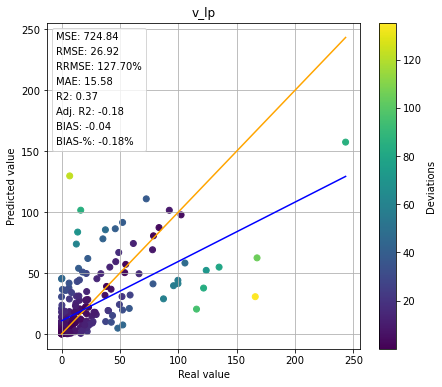

In [57]:
image_interp = RegressionInterpretation.from_ensemble(image, dl=test_image.train, ds_idx=0)
image_interp.plot_results(log_y=False)
plt.show()

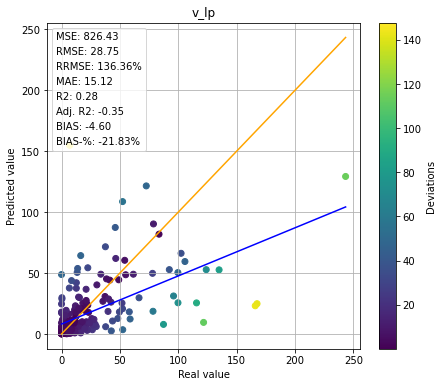

In [58]:
image_log_interp = RegressionInterpretation.from_ensemble(image_log, dl=test_image_log.train, ds_idx=0)
image_log_interp.plot_results(log_y=True)
plt.show()

## Both

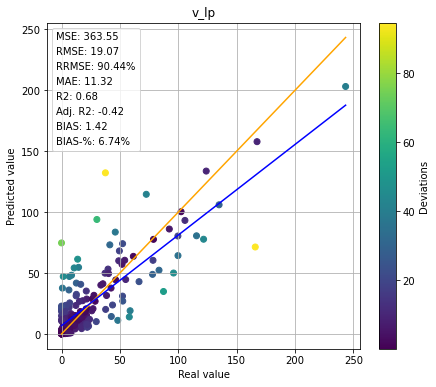

In [59]:
both_interp = RegressionInterpretation.from_ensemble(both, dl=test_both.train, ds_idx=0)
both_interp.plot_results(log_y=False)
plt.show()

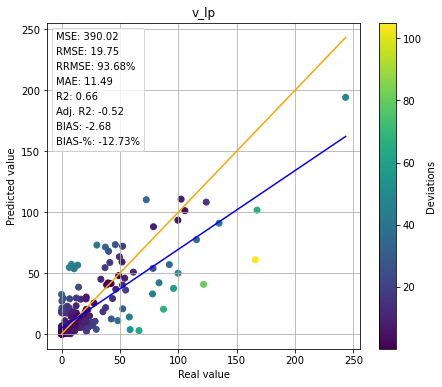

In [60]:
both_log_interp = RegressionInterpretation.from_ensemble(both_log, dl=test_both_log.train, ds_idx=0)
both_log_interp.plot_results(log_y=True)
plt.show()